# 03. Text Generation - GPTÍ∞Ä ÌÖçÏä§Ìä∏Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ï

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî **GPTÍ∞Ä Ïñ¥ÎñªÍ≤å ÌÖçÏä§Ìä∏Î•º ÏÉùÏÑ±ÌïòÎäîÏßÄ** Îã®Í≥ÑÎ≥ÑÎ°ú Ïù¥Ìï¥Ìï©ÎãàÎã§.

## ÌïµÏã¨ Í∞úÎÖê
- Autoregressive generation (ÏûêÍ∏∞ÌöåÍ∑Ä ÏÉùÏÑ±)
- Temperature sampling
- Top-k, Top-p sampling
- Beam search

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1337)

## 1. Autoregressive Generation Ïù¥Ìï¥

**ÌïµÏã¨**: Ìïú Î≤àÏóê Ìïú ÌÜ†ÌÅ∞Ïî© ÏÉùÏÑ±, Ïù¥Ï†Ñ Ï∂úÎ†•Ïù¥ Îã§Ïùå ÏûÖÎ†•

In [5]:
# Í∞ÑÎã®Ìïú vocabulary
vocab = ['<PAD>', 'The', 'cat', 'sat', 'on', 'the', 'mat', '.', 'dog', 'ran']
vocab_size = len(vocab)
print("vocab_size: ", vocab_size)
stoi = {ch: i for i, ch in enumerate(vocab)}  # string to int
itos = {i: ch for i, ch in enumerate(vocab)}  # int to string

print("Vocabulary:")
for i, word in enumerate(vocab):
    print(f"  {i}: {word}")

# ÏãúÏûë ÌÜ†ÌÅ∞
context = [stoi['The']]  # "The"Î°ú ÏãúÏûë
print(f"\nÏãúÏûë context: {[itos[i] for i in context]}")

vocab_size:  10
Vocabulary:
  0: <PAD>
  1: The
  2: cat
  3: sat
  4: on
  5: the
  6: mat
  7: .
  8: dog
  9: ran

ÏãúÏûë context: ['The']


## 2. Îã§Ïùå ÌÜ†ÌÅ∞ ÏòàÏ∏° Í≥ºÏ†ï

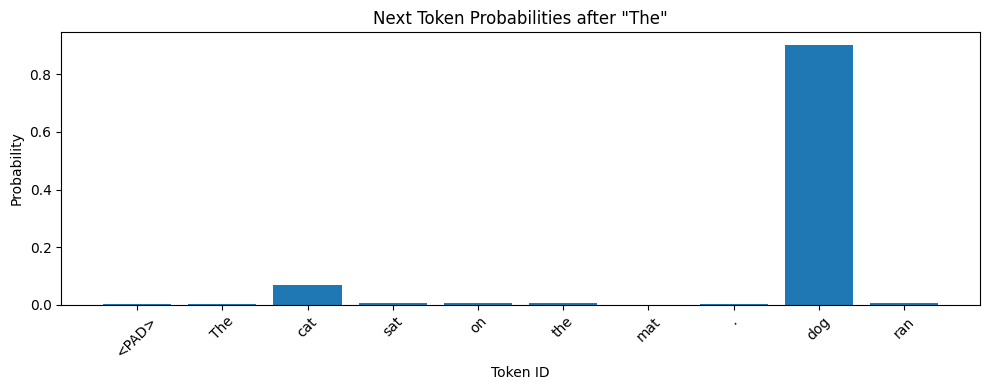


Top 3 predictions:
  dog        0.901
  cat        0.068
  ran        0.007


In [23]:
# Í∞ÄÏÉÅÏùò Î™®Îç∏ Ï∂úÎ†• (logits)
# Ïã§Ï†úÎ°úÎäî GPTÍ∞Ä ÏòàÏ∏°ÌïòÏßÄÎßå, Ïó¨Í∏∞ÏÑúÎäî ÏàòÎèôÏúºÎ°ú ÏÑ§Ï†ï
def mock_gpt_prediction(context):
    """Ï£ºÏñ¥ÏßÑ contextÏóêÏÑú Îã§Ïùå ÌÜ†ÌÅ∞ ÌôïÎ•† Î∞òÌôò (Í∞ÄÏÉÅ)"""
    # Ïã§Ï†úÎ°úÎäî model(context)Î°ú Í≥ÑÏÇ∞
    logits = torch.randn(vocab_size)
    
    # Î¨∏Î≤ïÏ†ÅÏúºÎ°ú Í∞ÄÎä•Ìïú Ìå®ÌÑ¥ Í∞ïÏ°∞ (ÏòàÏãú)
    if context[-1] == stoi['The']:
        logits[stoi['cat']] += 3
        logits[stoi['dog']] += 2
    elif context[-1] == stoi['cat']:
        logits[stoi['sat']] += 3
        logits[stoi['ran']] += 1
    elif context[-1] == stoi['sat']:
        logits[stoi['on']] += 4

    return logits

# ÏòàÏ∏°
logits = mock_gpt_prediction(context)
probs = F.softmax(logits, dim=-1)

# ÌôïÎ•† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 4))
plt.bar(range(vocab_size), probs.numpy())
plt.xlabel('Token ID')
plt.ylabel('Probability')
plt.title('Next Token Probabilities after "The"')
plt.xticks(range(vocab_size), vocab, rotation=45)
plt.tight_layout()
plt.show()

# Top 3 ÌôïÎ•†
top_probs, top_indices = torch.topk(probs, 3)
print("\nTop 3 predictions:")
for prob, idx in zip(top_probs, top_indices):
    print(f"  {itos[idx.item()]:10} {prob:.3f}")

In [19]:
def itos_explanation():
    print("itos[idx.item()]Ïùò ÏùòÎØ∏:")
    print("itos: integer to string (Ïà´Ïûê ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò)")
    print("idx: ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§")
    print("idx.item(): ÌÖêÏÑúÎ•º Ïä§ÏπºÎùº Í∞íÏúºÎ°ú Î≥ÄÌôò")
    
    # ÏòàÏãú
    itos = {0: 'The', 1: 'cat', 2: 'dog', 3: 'sat', 4: 'ran', 5: 'on'}
    idx = torch.tensor(1)
    
    print(f"idx: {idx}")
    print(f"idx.item(): {idx.item()}")
    print(f"itos[idx.item()]: {itos[idx.item()]}")

itos_explanation()

itos[idx.item()]Ïùò ÏùòÎØ∏:
itos: integer to string (Ïà´Ïûê ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò)
idx: ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§
idx.item(): ÌÖêÏÑúÎ•º Ïä§ÏπºÎùº Í∞íÏúºÎ°ú Î≥ÄÌôò
idx: 1
idx.item(): 1
itos[idx.item()]: cat


## 3. Greedy Decoding vs Sampling

**Greedy**: Ìï≠ÏÉÅ Í∞ÄÏû• ÌôïÎ•† ÎÜíÏùÄ ÌÜ†ÌÅ∞ ÏÑ†ÌÉù
**Sampling**: ÌôïÎ•† Î∂ÑÌè¨ÏóêÏÑú ÎûúÎç§ ÏÉòÌîåÎßÅ

In [25]:
def generate_greedy(start_context, num_tokens=5):
    """Greedy decoding: Ìï≠ÏÉÅ ÏµúÍ≥† ÌôïÎ•† ÏÑ†ÌÉù"""
    context = start_context.copy()
    
    for _ in range(num_tokens):
        logits = mock_gpt_prediction(context)
        probs = F.softmax(logits, dim=-1)
        next_token = torch.argmax(probs).item()
        context.append(next_token)
    
    return context

def generate_sampling(start_context, num_tokens=5):
    """Random sampling: ÌôïÎ•†Ïóê Îî∞Îùº ÏÉòÌîåÎßÅ"""
    context = start_context.copy()
    
    for _ in range(num_tokens):
        logits = mock_gpt_prediction(context)
        probs = F.softmax(logits, dim=-1)
        next_token = torch.multinomial(probs, 1).item()
        context.append(next_token)
    
    return context

# ÎπÑÍµê
print("Greedy Decoding (Í≤∞Ï†ïÏ†Å):")
for i in range(3):
    result = generate_greedy([stoi['The']], 4)
    print(f"  {i+1}: {' '.join([itos[t] for t in result])}")

print("\nRandom Sampling (Îã§ÏñëÌï®):")
for i in range(3):
    result = generate_sampling([stoi['The']], 4)
    print(f"  {i+1}: {' '.join([itos[t] for t in result])}")

Greedy Decoding (Í≤∞Ï†ïÏ†Å):
  1: The cat sat on dog
  2: The cat sat on dog
  3: The cat sat on <PAD>

Random Sampling (Îã§ÏñëÌï®):
  1: The cat sat . dog
  2: The cat sat on cat
  3: The dog The cat sat


## 4. Temperature Sampling

TemperatureÎ°ú ÌôïÎ•† Î∂ÑÌè¨Ïùò "sharpness" Ï°∞Ï†à:
- **Low temperature (< 1.0)**: Îçî ÌôïÏã§Ìïú ÏÑ†ÌÉù
- **High temperature (> 1.0)**: Îçî Îã§ÏñëÌïú ÏÑ†ÌÉù

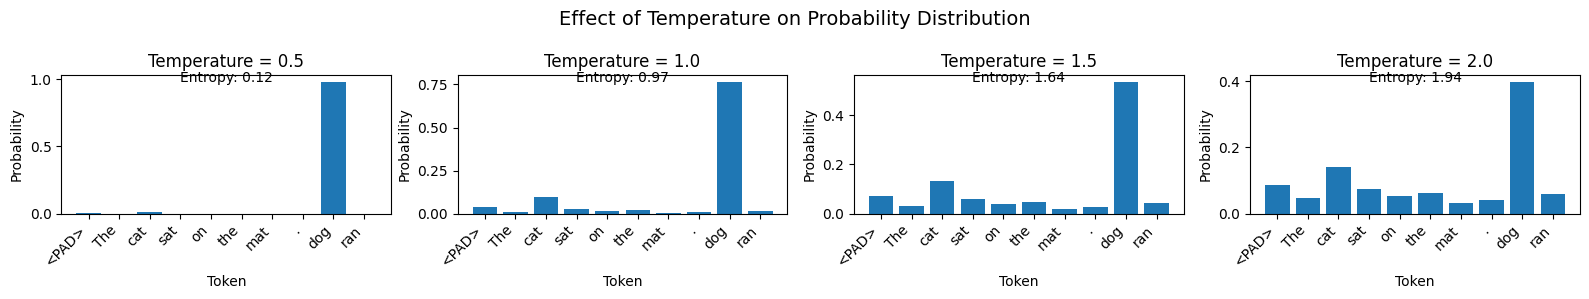

Temperature Ìö®Í≥º:
- ÎÇÆÏùÄ T (0.5): ÌôïÎ•† Ï∞®Ïù¥ Ï¶ùÌè≠, Î≥¥ÏàòÏ†Å ÏÑ†ÌÉù
- ÎÜíÏùÄ T (2.0): ÌôïÎ•† ÌèâÏ§ÄÌôî, Ï∞ΩÏùòÏ†Å ÏÑ†ÌÉù


In [27]:
def apply_temperature(logits, temperature):
    """TemperatureÎ•º Ï†ÅÏö©Ìïú logits"""
    return logits / temperature

# Îã§ÏñëÌïú temperature ÎπÑÍµê
logits = mock_gpt_prediction([stoi['The']])
temperatures = [0.5, 1.0, 1.5, 2.0]

fig, axes = plt.subplots(1, 4, figsize=(16, 3))

for i, temp in enumerate(temperatures):
    scaled_logits = apply_temperature(logits, temp)
    probs = F.softmax(scaled_logits, dim=-1)
    
    axes[i].bar(range(vocab_size), probs.numpy())
    axes[i].set_title(f'Temperature = {temp}')
    axes[i].set_xlabel('Token')
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(range(vocab_size))
    axes[i].set_xticklabels(vocab, rotation=45, ha='right')
    
    # Entropy Í≥ÑÏÇ∞ (Îã§ÏñëÏÑ± Ï≤ôÎèÑ)
    entropy = -(probs * torch.log(probs + 1e-8)).sum().item()
    axes[i].text(0.5, 0.95, f'Entropy: {entropy:.2f}', 
                transform=axes[i].transAxes, ha='center')

plt.suptitle('Effect of Temperature on Probability Distribution', fontsize=14)
plt.tight_layout()
plt.show()

print("Temperature Ìö®Í≥º:")
print("- ÎÇÆÏùÄ T (0.5): ÌôïÎ•† Ï∞®Ïù¥ Ï¶ùÌè≠, Î≥¥ÏàòÏ†Å ÏÑ†ÌÉù")
print("- ÎÜíÏùÄ T (2.0): ÌôïÎ•† ÌèâÏ§ÄÌôî, Ï∞ΩÏùòÏ†Å ÏÑ†ÌÉù")

## 5. Top-k Sampling

ÏÉÅÏúÑ kÍ∞ú ÌÜ†ÌÅ∞ Ï§ëÏóêÏÑúÎßå ÏÉòÌîåÎßÅ

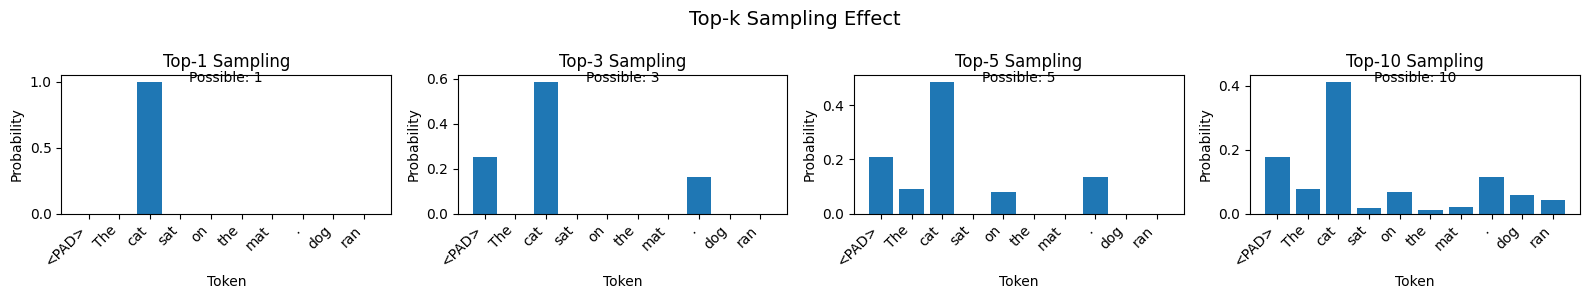

Top-k Ìö®Í≥º:
- k=1: Greedy decodingÍ≥º ÎèôÏùº
- k=3: ÏÉÅÏúÑ 3Í∞ú Ï§ë ÏÑ†ÌÉù (ÏïàÏ†ÑÌïòÎ©¥ÏÑúÎèÑ Îã§Ïñë)
- k=10: Í±∞Ïùò Î™®Îì† ÌÜ†ÌÅ∞ Í∞ÄÎä• (ÏõêÎ≥∏Í≥º Ïú†ÏÇ¨)


In [35]:
def top_k_sampling(logits, k=3, temperature=1.0):
    """Top-k ÌÜ†ÌÅ∞ Ï§ëÏóêÏÑúÎßå ÏÉòÌîåÎßÅ"""
    # Temperature Ï†ÅÏö©
    logits = logits / temperature
    
    # Top-k ÌïÑÌÑ∞ÎßÅ
    top_k_values, top_k_indices = torch.topk(logits, k)
    
    # ÎÇòÎ®∏ÏßÄÎäî -infÎ°ú ÏÑ§Ï†ï
    filtered_logits = torch.full_like(logits, float('-inf'))
    filtered_logits[top_k_indices] = top_k_values
    
    # Softmax & sampling
    probs = F.softmax(filtered_logits, dim=-1)
    next_token = torch.multinomial(probs, 1).item()
    
    return next_token, probs

# Top-k Ìö®Í≥º ÏãúÍ∞ÅÌôî
logits = mock_gpt_prediction([stoi['The']])
k_values = [1, 3, 5, 10]

fig, axes = plt.subplots(1, 4, figsize=(16, 3))

for i, k in enumerate(k_values):
    _, probs = top_k_sampling(logits.clone(), k=k)
    
    axes[i].bar(range(vocab_size), probs.numpy())
    axes[i].set_title(f'Top-{k} Sampling')
    axes[i].set_xlabel('Token')
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(range(vocab_size))
    axes[i].set_xticklabels(vocab, rotation=45, ha='right')
    
    # Ïã§Ï†ú ÏÑ†ÌÉù Í∞ÄÎä•Ìïú ÌÜ†ÌÅ∞ Ïàò
    num_possible = (probs > 0).sum().item()
    axes[i].text(0.5, 0.95, f'Possible: {num_possible}', 
                transform=axes[i].transAxes, ha='center')

plt.suptitle('Top-k Sampling Effect', fontsize=14)
plt.tight_layout()
plt.show()

print("Top-k Ìö®Í≥º:")
print("- k=1: Greedy decodingÍ≥º ÎèôÏùº")
print("- k=3: ÏÉÅÏúÑ 3Í∞ú Ï§ë ÏÑ†ÌÉù (ÏïàÏ†ÑÌïòÎ©¥ÏÑúÎèÑ Îã§Ïñë)")
print("- k=10: Í±∞Ïùò Î™®Îì† ÌÜ†ÌÅ∞ Í∞ÄÎä• (ÏõêÎ≥∏Í≥º Ïú†ÏÇ¨)")

In [34]:
def top_k_usage():
    print("Top-k ÏÉòÌîåÎßÅÏóêÏÑú full_like ÏÇ¨Ïö© Ïù¥Ïú†:")
    
    # Í∞ÄÏÉÅÏùò logits
    logits = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
    print(f"ÏõêÎ≥∏ logits: {logits}")
    print(f"logits ÌòïÌÉú: {logits.shape}")
    print(f"logits Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: {logits.dtype}")
    
    # full_likeÎ°ú -infÎ°ú Ï¥àÍ∏∞Ìôî
    filtered_logits = torch.full_like(logits, float('-inf'))
    top_k_indices = torch.tensor([0, 1, 2])
    top_k_values = torch.tensor([12.0, 13.0, 14.0])
    filtered_logits[top_k_indices] = top_k_values
    print(f"\nfull_like Í≤∞Í≥º: {filtered_logits}")
    print(f"Í≤∞Í≥º ÌòïÌÉú: {filtered_logits.shape}")
    print(f"Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: {filtered_logits.dtype}")
    
    print(f"\nÏû•Ï†ê:")
    print("1. ÏõêÎ≥∏Í≥º Ï†ïÌôïÌûà Í∞ôÏùÄ ÌòïÌÉú Ïú†ÏßÄ")
    print("2. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÎèÑ ÏûêÎèôÏúºÎ°ú ÎßûÏ∂§")
    print("3. Í∞ÑÎã®ÌïòÍ≥† Ìö®Ïú®Ï†Å")

top_k_usage()

Top-k ÏÉòÌîåÎßÅÏóêÏÑú full_like ÏÇ¨Ïö© Ïù¥Ïú†:
ÏõêÎ≥∏ logits: tensor([1., 2., 3., 4., 5.])
logits ÌòïÌÉú: torch.Size([5])
logits Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: torch.float32

full_like Í≤∞Í≥º: tensor([12., 13., 14., -inf, -inf])
Í≤∞Í≥º ÌòïÌÉú: torch.Size([5])
Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: torch.float32

Ïû•Ï†ê:
1. ÏõêÎ≥∏Í≥º Ï†ïÌôïÌûà Í∞ôÏùÄ ÌòïÌÉú Ïú†ÏßÄ
2. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÎèÑ ÏûêÎèôÏúºÎ°ú ÎßûÏ∂§
3. Í∞ÑÎã®ÌïòÍ≥† Ìö®Ïú®Ï†Å


## 6. Top-p (Nucleus) Sampling

ÎàÑÏ†Å ÌôïÎ•†Ïù¥ pÎ•º ÎÑòÏùÑ ÎïåÍπåÏßÄÏùò ÌÜ†ÌÅ∞Îßå ÏÇ¨Ïö©

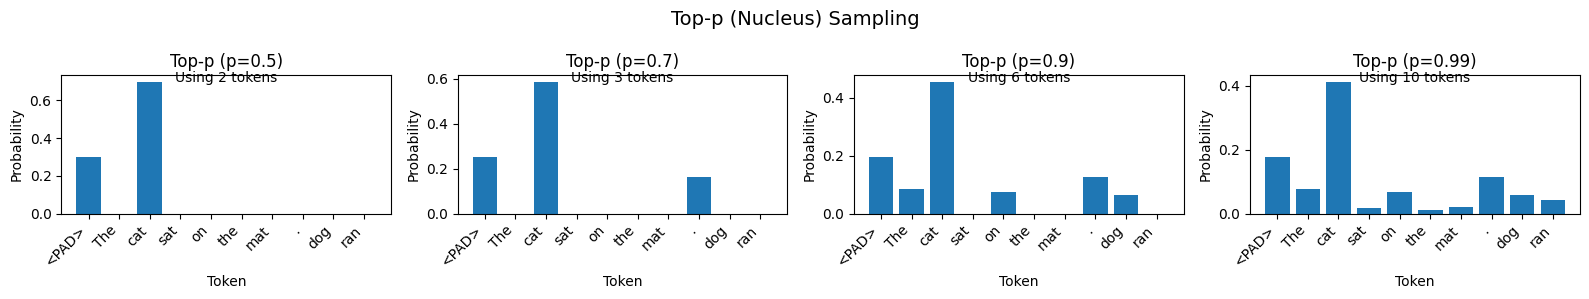

Top-p Ïû•Ï†ê:
- ÎèôÏ†Å ÏÑ†ÌÉù: ÌôïÎ•† Î∂ÑÌè¨Ïóê Îî∞Îùº kÍ∞Ä ÏûêÎèô Ï°∞Ï†à
- Îçî ÏûêÏó∞Ïä§Îü¨Ïö¥ ÏÉòÌîåÎßÅ


In [36]:
def top_p_sampling(logits, p=0.9, temperature=1.0):
    """ÎàÑÏ†Å ÌôïÎ•† pÍπåÏßÄÏùò ÌÜ†ÌÅ∞Îßå ÏÇ¨Ïö©"""
    # Temperature & softmax
    logits = logits / temperature
    probs = F.softmax(logits, dim=-1)
    
    # ÌôïÎ•† ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
    sorted_probs, sorted_indices = torch.sort(probs, descending=True)
    cumulative_probs = torch.cumsum(sorted_probs, dim=-1)
    
    # pÎ•º ÎÑòÎäî ÏßÄÏ†ê Ï∞æÍ∏∞
    cutoff_idx = torch.where(cumulative_probs > p)[0]
    if len(cutoff_idx) > 0:
        cutoff_idx = cutoff_idx[0].item()
    else:
        cutoff_idx = len(sorted_probs) - 1
    
    # ÌïÑÌÑ∞ÎßÅ
    filtered_logits = torch.full_like(logits, float('-inf'))
    selected_indices = sorted_indices[:cutoff_idx + 1]
    filtered_logits[selected_indices] = logits[selected_indices]
    
    # Ïû¨Ï†ïÍ∑úÌôî & ÏÉòÌîåÎßÅ
    final_probs = F.softmax(filtered_logits, dim=-1)
    next_token = torch.multinomial(final_probs, 1).item()
    
    return next_token, final_probs, cutoff_idx + 1

# Top-p Ìö®Í≥º ÏãúÍ∞ÅÌôî
p_values = [0.5, 0.7, 0.9, 0.99]
fig, axes = plt.subplots(1, 4, figsize=(16, 3))

for i, p in enumerate(p_values):
    _, probs, num_tokens = top_p_sampling(logits.clone(), p=p)
    
    axes[i].bar(range(vocab_size), probs.numpy())
    axes[i].set_title(f'Top-p (p={p})')
    axes[i].set_xlabel('Token')
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(range(vocab_size))
    axes[i].set_xticklabels(vocab, rotation=45, ha='right')
    axes[i].text(0.5, 0.95, f'Using {num_tokens} tokens', 
                transform=axes[i].transAxes, ha='center')

plt.suptitle('Top-p (Nucleus) Sampling', fontsize=14)
plt.tight_layout()
plt.show()

print("Top-p Ïû•Ï†ê:")
print("- ÎèôÏ†Å ÏÑ†ÌÉù: ÌôïÎ•† Î∂ÑÌè¨Ïóê Îî∞Îùº kÍ∞Ä ÏûêÎèô Ï°∞Ï†à")
print("- Îçî ÏûêÏó∞Ïä§Îü¨Ïö¥ ÏÉòÌîåÎßÅ")

## 7. Ï†ÑÏ≤¥ ÏÉùÏÑ± ÌååÏù¥ÌîÑÎùºÏù∏

In [54]:
@torch.no_grad()
def generate(start_tokens, max_new_tokens=10, 
             temperature=1.0, top_k=None, top_p=None):
    """
    ÏôÑÏ†ÑÌïú ÌÖçÏä§Ìä∏ ÏÉùÏÑ± Ìï®Ïàò
    """
    context = start_tokens.copy()
    
    for _ in range(max_new_tokens):
        # Î™®Îç∏ ÏòàÏ∏° (Í∞ÄÏÉÅ)
        logits = mock_gpt_prediction(context)
        
        # Temperature Ï†ÅÏö©
        logits = logits / temperature
        
        # Top-k ÌïÑÌÑ∞ÎßÅ
        if top_k is not None:
            v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
            logits[logits < v[-1]] = float('-inf')
        
        # Top-p ÌïÑÌÑ∞ÎßÅ
        if top_p is not None:
            sorted_logits, sorted_indices = torch.sort(logits, descending=True)
            cumulative_probs = torch.cumsum(
                F.softmax(sorted_logits, dim=-1), dim=-1
            )
            sorted_indices_to_remove = cumulative_probs > top_p
            sorted_indices_to_remove[0] = False  # ÏµúÏÜå 1Í∞úÎäî Ïú†ÏßÄ
            indices_to_remove = sorted_indices[sorted_indices_to_remove]
            logits[indices_to_remove] = float('-inf')
        
        # ÌôïÎ•† Í≥ÑÏÇ∞ & ÏÉòÌîåÎßÅ
        probs = F.softmax(logits, dim=-1)
        next_token = torch.multinomial(probs, num_samples=1).item()
        
        context.append(next_token)
        
        # Ï¢ÖÎ£å Ï°∞Í±¥ (Ïòà: ÎßàÏπ®Ìëú)
        if next_token == stoi['.']:
            break
    
    return context

# Îã§ÏñëÌïú ÏÑ§Ï†ïÏúºÎ°ú ÏÉùÏÑ±
settings = [
    {"name": "Greedy", "temp": 0.01, "top_k": 1},
    {"name": "Conservative", "temp": 0.7, "top_k": 5},
    {"name": "Balanced", "temp": 1.0, "top_p": 0.9},
    {"name": "Creative", "temp": 1.3, "top_p": 0.95},
]

print("Îã§ÏñëÌïú ÏÉùÏÑ± Ï†ÑÎûµ:\n")
for setting in settings:
    print(f"{setting['name']:15}:", end=" ")
    
    tokens = generate(
        [stoi['The']], 
        max_new_tokens=6,
        temperature=setting.get('temp', 1.0),
        top_k=setting.get('top_k'),
        top_p=setting.get('top_p')
    )
    
    text = ' '.join([itos[t] for t in tokens])
    print(text)

Îã§ÏñëÌïú ÏÉùÏÑ± Ï†ÑÎûµ:

Greedy         : The cat sat on cat sat on
Conservative   : The dog ran ran .
Balanced       : The dog ran sat on ran on
Creative       : The the <PAD> sat on dog sat


## 8. Repetition Penalty

Î∞òÎ≥µÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌïú ÌéòÎÑêÌã∞

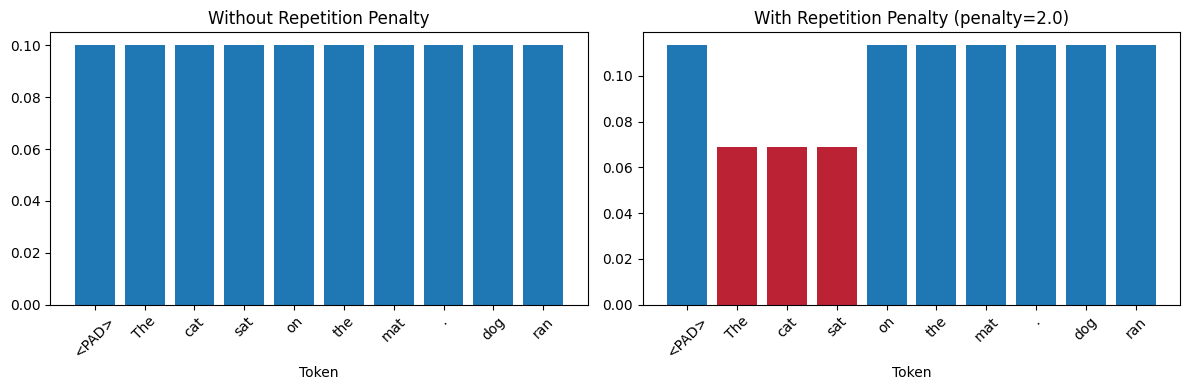

Îπ®Í∞ÑÏÉâ ÎßâÎåÄ = Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞ (ÌéòÎÑêÌã∞ Ï†ÅÏö©)
‚Üí Î∞òÎ≥µ ÌôïÎ•† Í∞êÏÜå


In [55]:
def apply_repetition_penalty(logits, generated_tokens, penalty=1.2):
    """Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞Ïóê ÌéòÎÑêÌã∞ Ï†ÅÏö©"""
    for token in set(generated_tokens):
        # Ïù¥ÎØ∏ ÎÇòÏò® ÌÜ†ÌÅ∞Ïùò logitÏùÑ Í∞êÏÜå
        logits[token] = logits[token] / penalty
    return logits

# Î∞òÎ≥µ ÌéòÎÑêÌã∞ Ìö®Í≥º ÏãúÏó∞
context = [stoi['The'], stoi['cat'], stoi['sat']]
logits = torch.tensor([1.0] * vocab_size)  # Í∑†Îì±Ìïú logits

# ÌéòÎÑêÌã∞ ÏóÜÏùå
probs_no_penalty = F.softmax(logits, dim=-1)

# ÌéòÎÑêÌã∞ Ï†ÅÏö©
logits_with_penalty = apply_repetition_penalty(logits.clone(), context, penalty=2.0)
probs_with_penalty = F.softmax(logits_with_penalty, dim=-1)

# ÎπÑÍµê ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(range(vocab_size), probs_no_penalty.numpy())
ax1.set_title('Without Repetition Penalty')
ax1.set_xlabel('Token')
ax1.set_xticks(range(vocab_size))
ax1.set_xticklabels(vocab, rotation=45)

ax2.bar(range(vocab_size), probs_with_penalty.numpy())
ax2.set_title('With Repetition Penalty (penalty=2.0)')
ax2.set_xlabel('Token')
ax2.set_xticks(range(vocab_size))
ax2.set_xticklabels(vocab, rotation=45)

# Ïù¥ÎØ∏ ÎÇòÏò® ÌÜ†ÌÅ∞ ÌëúÏãú
for idx in context:
    ax2.bar(idx, probs_with_penalty[idx].numpy(), color='red', alpha=0.7)

plt.tight_layout()
plt.show()

print("Îπ®Í∞ÑÏÉâ ÎßâÎåÄ = Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞ (ÌéòÎÑêÌã∞ Ï†ÅÏö©)")
print("‚Üí Î∞òÎ≥µ ÌôïÎ•† Í∞êÏÜå")

## üí° ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏

1. **Autoregressive = ÏàúÏ∞®Ï†Å ÏÉùÏÑ±**
   - Ìïú Î≤àÏóê Ìïú ÌÜ†ÌÅ∞
   - Ïù¥Ï†Ñ Ï∂úÎ†•Ïù¥ Îã§Ïùå ÏûÖÎ†•

2. **Temperature = Ï∞ΩÏùòÏÑ± Ï°∞Ï†à**
   - Low: ÏïàÏ†ÑÌïòÍ≥† ÏòàÏ∏° Í∞ÄÎä•
   - High: Ï∞ΩÏùòÏ†ÅÏù¥Í≥† Îã§ÏñëÌï®

3. **Top-k/Top-p = ÌíàÏßà Î≥¥Ïû•**
   - ÎÇÆÏùÄ ÌôïÎ•† ÌÜ†ÌÅ∞ Ï†úÍ±∞
   - Î¨¥ÏùòÎØ∏Ìïú Ï∂úÎ†• Î∞©ÏßÄ

4. **Trade-offs**
   - Quality vs Diversity
   - Safety vs Creativity
   - Speed vs Accuracy

## üéØ Ïã§Ï†Ñ ÌåÅ

### Ïö©ÎèÑÎ≥Ñ Ï∂îÏ≤ú ÏÑ§Ï†ï

**ÏΩîÎìú ÏÉùÏÑ±**
```python
temperature=0.2, top_k=10
# Ï†ïÌôïÏÑ± Ï§ëÏöî, Ï∞ΩÏùòÏÑ± Î∂àÌïÑÏöî
```

**Ï∞ΩÏûë Í∏ÄÏì∞Í∏∞**
```python
temperature=1.0, top_p=0.9
# Îã§ÏñëÏÑ±Í≥º Ï∞ΩÏùòÏÑ± Ï§ëÏöî
```

**ÎåÄÌôî/Ï±óÎ¥á**
```python
temperature=0.7, top_k=40
# Í∑†ÌòïÏû°Ìûå ÏùëÎãµ
```

**ÏöîÏïΩ/Î≤àÏó≠**
```python
temperature=0.3, top_k=5
# Ï†ïÌôïÏÑ±Í≥º ÏùºÍ¥ÄÏÑ± Ï§ëÏöî
```